# DATA SCIENCE ENGINEERING ASSESSEMENT SOLUTION

## SECTION A (Data Ingestation and API Communication) - Python
In this section, I levaraged on the Request HTTP library which helped me to send HTTP requests and recieve data using the json method. 

The link to the package can be downloaded from here https://pypi.org/project/requests/

The code below shows the systematic steps followed in getting the required data from the github using the github API

In [1]:
# import the necesaary libraries
import requests
import pandas as pd

# enter keyword
keyword = str(input("Kindly enter the keyword: "))
 #search for the top repositories
api_url = f"https://api.github.com/search/repositories?q={keyword}"
#send get request
response = requests.get(api_url)

#get the json data
data =  response.json()


#get the json data
data =  response.json()

# Get dataframe
all_df = pd.DataFrame()
for i in data['items']:
    owner = i['owner']
    link_url = owner['url']

    #send get request
    response_link = requests.get(link_url)

    #get the json data
    info =  response_link.json()

    df = pd.DataFrame([info])
    all_df = all_df.append(df, ignore_index=True)
    
required_columns = ['name', 'login', 'bio', 'blog', 'company', 'email', 
                    'followers', 'following', 'id', 'url', 'location']  

required_dataframe = pd.DataFrame(all_df, columns=required_columns)

required_dataframe.head()

Kindly enter the keyword: Machine Learning: Nigeria


C:\Users\Sir_Praise\anaconda3\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


,name,login,bio,blog,company,email,followers,following,id,url,location
0,Femi Oladeji,femioladeji,Fullstack dev. I love all things js. Serverles...,http://femioladeji.com,None,None,143,61,17332992,https://api.github.com/users/femioladeji,"Amsterdam, Netherlands"
1,Microsoft,microsoft,Open source projects and samples from Microsoft,https://opensource.microsoft.com,None,opensource@microsoft.com,0,0,6154722,https://api.github.com/users/microsoft,"Redmond, WA"
2,Victor E. Irekponor,marquisvictor,Data Scientist | Deep Machine Learning Engine...,https://medium.com/@IrekponorVictor,Data Scientist / SWE @Retina-AI,None,55,14,35049903,https://api.github.com/users/marquisvictor,Lagos Nigeria
3,Omdena Inc.,OmdenaAI,None,,None,None,0,0,67275719,https://api.github.com/users/OmdenaAI,None
4,None,helaisha,None,,None,None,1,1,54373934,https://api.github.com/users/helaisha,None


In [2]:
# we check the shape of the data
required_dataframe.shape

(30, 11)

In [3]:
# we export the data
required_dataframe.to_csv('techies_data_nigeria.csv', index=False)

## SECTION B (Data Storage and Reporting) - SKLEARN/SQL

## 1. Mean Shift Cluster Analysis
Here, I have described the systematic steps carried out in performing a simple cluster analysis, using the Mean Shift method. 

#### 1. We Load the data

In [1]:
# import necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# get data
techies_data_nigeria = pd.read_csv('techies_data_nigeria.csv')

In [3]:
techies_data_nigeria.head() # get the first five rows of data

,name,login,bio,blog,company,email,followers,following,id,url,location
0,Femi Oladeji,femioladeji,Fullstack dev. I love all things js. Serverles...,http://femioladeji.com,NaN,NaN,143,61,17332992,https://api.github.com/users/femioladeji,"Amsterdam, Netherlands"
1,Microsoft,microsoft,Open source projects and samples from Microsoft,https://opensource.microsoft.com,NaN,opensource@microsoft.com,0,0,6154722,https://api.github.com/users/microsoft,"Redmond, WA"
2,Victor E. Irekponor,marquisvictor,Data Scientist | Deep Machine Learning Engine...,https://medium.com/@IrekponorVictor,Data Scientist / SWE @Retina-AI,NaN,55,14,35049903,https://api.github.com/users/marquisvictor,Lagos Nigeria
3,Omdena Inc.,OmdenaAI,NaN,NaN,NaN,NaN,0,0,67275719,https://api.github.com/users/OmdenaAI,NaN
4,NaN,helaisha,NaN,NaN,NaN,NaN,1,1,54373934,https://api.github.com/users/helaisha,NaN


## Data Quality Issues
Is very important to identify and handle some of the encountered data quality issues so that it will be feedable to our model and equally ensure that any bias is avoided. 

1. ### Detecting and Handling Duplicates
First, lets checkout for duplicates, using the simple function count for uniques below. We will be making use of the 'id' column because of its expected uniqueness. 

In [4]:
def count_unique(techies_data_nigeria, cols):
    
    for col in cols:
        print('\n' + 'For column ' + col)
        print(techies_data_nigeria[col].value_counts())

cat_cols = ['id']

count_unique(techies_data_nigeria, cat_cols)


For column id
38926059    3
49945789    1
87527273    1
86238341    1
67275719    1
26260619    1
32442828    1
25937490    1
47320343    1
68328859    1
19632990    1
6154722     1
2711141     1
78174119    1
86897066    1
51395068    1
68706251    1
45665517    1
54373934    1
35049903    1
54807024    1
28939122    1
45480178    1
40832438    1
7585826     1
48096696    1
5084987     1
17332992    1
Name: id, dtype: int64


From above, it shows that we are having a particular id appearing 3 times, hence, to handle this we use the pandas drop_duplicate method to drop the duplicates while leaving the first observation.

In [5]:
# We drop the row
techies_data_nigeria.drop_duplicates(subset= 'id', 
                                    keep='first', 
                                    inplace=True)

Is always important to check and confirm the validaty of our codes.

In [6]:
# Check again to confirm
count_unique(techies_data_nigeria, cat_cols)


For column id
49945789    1
51395068    1
86238341    1
67275719    1
26260619    1
32442828    1
25937490    1
47320343    1
68328859    1
19632990    1
6154722     1
2711141     1
78174119    1
87527273    1
86897066    1
38926059    1
68706251    1
45665517    1
54373934    1
35049903    1
54807024    1
28939122    1
45480178    1
40832438    1
7585826     1
48096696    1
5084987     1
17332992    1
Name: id, dtype: int64


The duplicates are handled !

## Note !
There are other data issues which can be handled, however we may be leaving them for now as they will be handled subseqently in this project.

### 2. Select the required features


Next, we select the necessary features. The following reasons support while the 'login', 'followers', 'following', 'id' and 'url' were chosen as inputes;
* Since clustering analysis involves a method of classifying data into groups of uniquenesses, hence it will be very imperative to select those features that are perculiar to the users. 
* These features are mostly clean with little or no missing data points, thereby availing us with unsynthetic data values by  means of imputation methods

In [7]:
# create new dataframe
techies_df = pd.DataFrame(techies_data_nigeria, columns=['login', 'followers', 'following', 'id', 'url'] )
techies_df.head()

,login,followers,following,id,url
0,femioladeji,143,61,17332992,https://api.github.com/users/femioladeji
1,microsoft,0,0,6154722,https://api.github.com/users/microsoft
2,marquisvictor,55,14,35049903,https://api.github.com/users/marquisvictor
3,OmdenaAI,0,0,67275719,https://api.github.com/users/OmdenaAI
4,helaisha,1,1,54373934,https://api.github.com/users/helaisha


### 3. Feature Encoding
Since our model only accepts numerical data points, hence is necessary to encode the string or object features. For this reason the ordinal encoding method will be used.

In [8]:
# ordinal encode input variables
from sklearn.preprocessing import OrdinalEncoder

ord_en = OrdinalEncoder()
X_ord = ord_en.fit_transform(techies_df[['login', 'url']])
Xord_df = pd.DataFrame(X_ord, columns=['login', 'url'])

In [9]:
Xord_df[['followers', 'following', 'id']] = techies_df[['followers', 'following', 'id']]

In [10]:
Xord_df.head() # lets see the encoded data

,login,url,followers,following,id
0,16.0,16.0,143.0,61.0,17332992.0
1,22.0,22.0,0.0,0.0,6154722.0
2,21.0,21.0,55.0,14.0,35049903.0
3,5.0,5.0,0.0,0.0,67275719.0
4,19.0,19.0,1.0,1.0,54373934.0


In [11]:
# lets check for missing values
Xord_df.isnull().sum()

login        0
url          0
followers    2
following    2
id           2
dtype: int64

We can see that last 3 features have missing values. However, it will be better to replace the 'followers' and the 'following' features with their mean whie the 'id' will be droped since any form of replacement will lead to duplication.

In [12]:
Xord_df['followers'] = Xord_df['followers'].fillna(Xord_df['followers'].mean())
Xord_df['following'] = Xord_df['following'].fillna(Xord_df['following'].mean())

Xord_df = Xord_df.dropna()

In [13]:
Xord_df.isnull().sum()

login        0
url          0
followers    0
following    0
id           0
dtype: int64

### 4. Feature Scaling
Next, we scale the data into common or similar data ranges so as to avoid any form of bias by our model. To this effect, the StandardScaler method would be adopted as seen below.

In [14]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
X_input = trans.fit_transform(Xord_df)

In [15]:
X_input # array of the scaled data

array([[ 0.27219014,  0.27219014,  3.60269409,  2.13332593, -1.03061795],
       [ 0.99187934,  0.99187934, -0.49734161, -0.51828451, -1.46578886],
       [ 0.87193114,  0.87193114,  1.0795952 ,  0.09028182, -0.34089726],
       [-1.04724005, -1.04724005, -0.49734161, -0.51828451,  0.91365622],
       [ 0.63203474,  0.63203474, -0.46867003, -0.47481549,  0.41138875],
       [-0.68739545, -0.68739545, -0.49734161, -0.47481549, -0.94107885],
       [ 0.75198294,  0.75198294, -0.49734161, -0.51828451,  1.70205076],
       [-0.56744725, -0.56744725,  0.36280574, -0.30093939, -0.18999821],
       [ 1.23177574,  1.23177574, -0.41132687, -0.04012525, -1.59984773],
       [ 0.03229375,  0.03229375, -0.46867003, -0.47481549,  0.29542127],
       [ 0.39213834,  0.39213834, -0.49734161, -0.51828451,  1.33793177],
       [-1.40708464, -1.40708464, -0.32531214, -0.25747037, -1.41007587],
       [ 0.15224195,  0.15224195, -0.49734161, -0.47481549,  1.65187254],
       [-0.20760265, -0.20760265, -0.2

###  5. Mean Shift Implementation

number of estimated clusters : 4


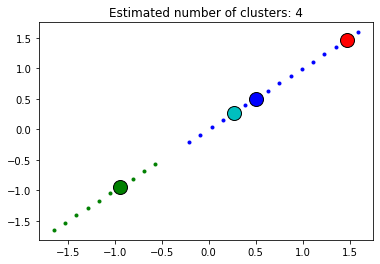

In [16]:
# get the necesary methods or functions
from sklearn.cluster import MeanShift, estimate_bandwidth

# Generate sample data

X = X_input 

# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=200)

ms = MeanShift(bandwidth=2, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

This shows or indicates 4 clusters from our data, for better understanding of our data, lets make use of seaborn library.

In [17]:
import seaborn as sns

In [18]:
# we quickly create the dataframe for our input data
df = pd.DataFrame(X_input, columns=['login','url','id','followers', 'following'])
df.head()

,login,url,id,followers,following
0,0.272190,0.272190,3.602694,2.133326,-1.030618
1,0.991879,0.991879,-0.497342,-0.518285,-1.465789
2,0.871931,0.871931,1.079595,0.090282,-0.340897
3,-1.047240,-1.047240,-0.497342,-0.518285,0.913656
4,0.632035,0.632035,-0.468670,-0.474815,0.411389


In [19]:
# we add the uniques clusters to a created column in our dataframe
df['clusters'] = labels

C:\Users\Sir_Praise\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sir_Praise\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sir_Praise\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sir_Praise\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sir_Praise\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sir_Praise\anaconda3\lib\site-packages\seaborn\distribut

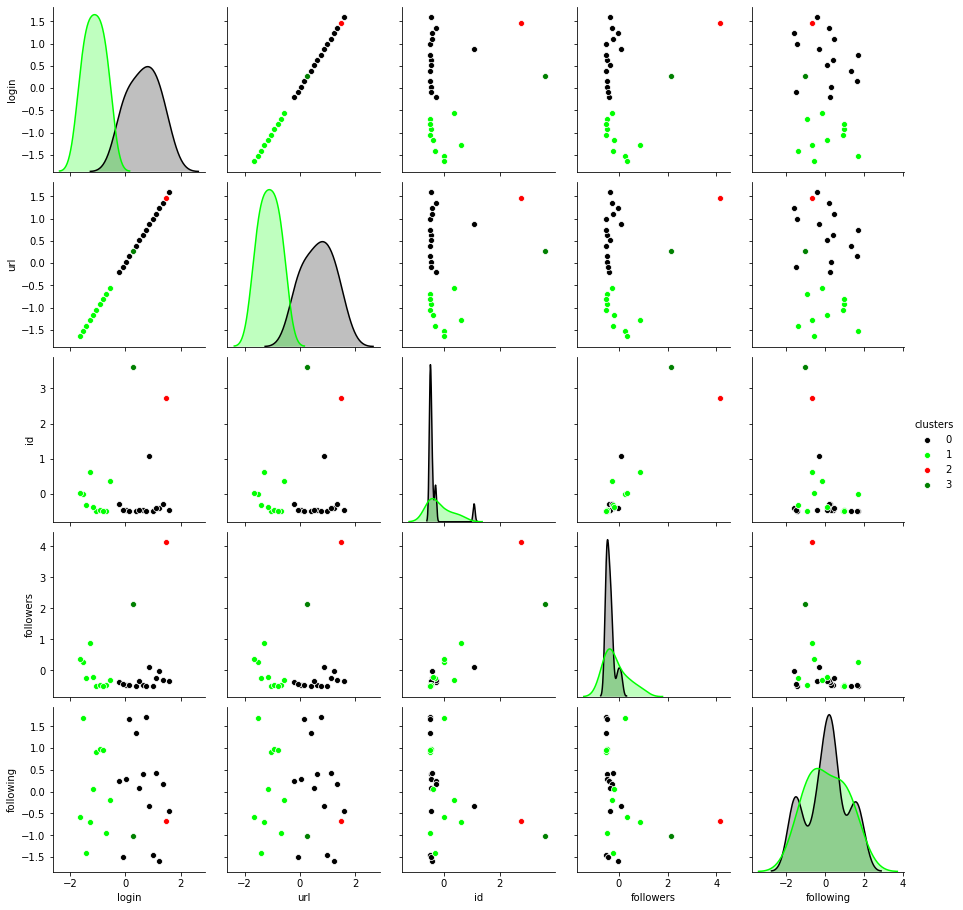

In [20]:
# Lets make a pairplot 
sns.pairplot(df, vars=['login','url','id','followers', 'following'], hue = 'clusters', 
             palette = ['black','lime', 'red', 'green', 'yellow'])

## Brief Explanation of the Clusters

The gaol of clustering anaysis is to find different groups within the elements in the data. Hence, to do so, clustering algorithms find the structure in the data so that elements of the same cluster (or group) are more similar to each other than to those from different clusters.



From the analysis carried, we can see that the algorithm identified 4 clusters otherwise known as groups. Hence, the clusters can signify any of the following:
* Cluster of users who are individuals
* Clusters of users who are  companies
* Clusters of users who have certain amount of followers or people following them
* Clusters of users who are employed or attached to a company.
## Note !
The above are just assumptions which must be validated through experimentations. Further research and analysis need to be carried out.

## 2. Writing Data into a Database

Here, I will be using the sqlite3 database library. Where I started first by creating the database and after which writing the data into the created database. 

In [21]:
# Lets see the data to be exported
df.head()

,login,url,id,followers,following,clusters
0,0.272190,0.272190,3.602694,2.133326,-1.030618,3
1,0.991879,0.991879,-0.497342,-0.518285,-1.465789,0
2,0.871931,0.871931,1.079595,0.090282,-0.340897,0
3,-1.047240,-1.047240,-0.497342,-0.518285,0.913656,1
4,0.632035,0.632035,-0.468670,-0.474815,0.411389,0


In [22]:
# impor the library
import sqlite3

## Create the (techies_database) Database

In [23]:
# create the database
conn = sqlite3.connect('techies_database')
c = conn.cursor()

In [24]:
# we define the columns and their data types
c.execute('CREATE TABLE IF NOT EXISTS techies (login number, url number, id number, followers number, following number, clusters number)')
conn.commit()

In [25]:
# We export the data
df.to_sql('techies', conn, if_exists='replace', index = False)

In [26]:
# We then excute
c.execute('''  
SELECT * FROM techies
          ''')

In [27]:
# We confirm the process by fetching the exported data
for row in c.fetchall():
    print (row)

(0.2721901444321165, 0.2721901444321165, 3.602694094225888, 2.133325926037297, -1.0306179526393688, 3)
(0.9918793398797463, 0.9918793398797463, -0.4973416089672101, -0.5182845118115691, -1.4657888569959396, 0)
(0.8719311406384747, 0.8719311406384747, 1.079595199953212, 0.09028181818653137, -0.340897255047087, 0)
(-1.0472400472218715, -1.0472400472218715, -0.4973416089672101, -0.5182845118115691, 0.9136562216848625, 1)
(0.6320347421559314, 0.6320347421559314, -0.46867003062320245, -0.4748154882402762, 0.411388746819428, 0)
(-0.6873954494980565, -0.6873954494980565, -0.4973416089672101, -0.4748154882402762, -0.9410788549365665, 1)
(0.751982941397203, 0.751982941397203, -0.4973416089672101, -0.5182845118115691, 1.702050764740803, 0)
(-0.5674472502567849, -0.5674472502567849, 0.3628057413530202, -0.3009393939551046, -0.18999820609343424, 1)
(1.2317757383622896, 1.2317757383622896, -0.4113268739351871, -0.04012525252734729, -1.5998477281803989, 0)
(0.03229374594957323, 0.03229374594957323, 

# Conclusion
We have therefore successfully 
* fetched the required data using the request method
* performed clustering analysis on the data
* written the data into a defined database

# Reference links

* https://www.techgeekbuzz.com/how-to-use-github-api-in-python/
* https://www.thepythoncode.com/article/using-github-api-in-python
* https://stackoverflow.com/questions/17128654/to-get-all-github-users-details
* https://datatofish.com/pandas-dataframe-to-sql/
* https://docs.microsoft.com/en-us/sql/samples/adventureworks-install-configure?view=sql-server-ver15&tabs=ssms
* https://pynative.com/python-mysql-insert-data-into-database-table/
* https://towardsdatascience.com/unsupervised-machine-learning-clustering-analysis-d40f2b34ae7e
* https://www.essentialsql.com/sqlite3-review-great-for-beginners-and-those-learning-sql/
* https://medium.com/pythoneers/fully-explained-mean-shift-clustering-with-python-51aef7a17c5d
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

# The End, Thanks !